### Agentic RAG

In [77]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")

In [78]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

### NIT Krushketra vector store

In [80]:
urls=[
    "https://nitkkr.ac.in/",
]

docs=[WebBaseLoader(urls).load()]
docs


[[Document(metadata={'source': 'https://nitkkr.ac.in/', 'title': 'National Institute of Technology, Kurukshetra – India, the land of seekers, is at the cusp of becoming Vishwa Guru all over again after 1100 years of subjugation, wars, annexures and humiliation. It is again a free country due to the sacrifices made by our leaders, freedom fighters and has learnt the art of standing tall in the midst of many a challenge of building the nation with its rich diversity, cultures, languages all over again since the last 75 years. Unity in Diversity is our mantra while making our nation stronger in every sphere.', 'description': 'Nitkkr Kurukshetra Nitkkr Kurukshetra', 'language': 'en-GB'}, page_content='\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNational Institute of Technology, Kurukshetra – India, the land of seekers, is at the cusp of becoming Vishwa Guru all over again after 1100 years of subjugation, wars, annexures and humiliation. It is again a free country due to the sacrifices made by 

In [81]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retriever=vectorstore.as_retriever()

In [82]:
retriever.invoke("who is director of NIT Kurukhestra")

[Document(id='7038b0a2-c53e-4b6d-919c-56d2daba6759', metadata={'source': 'https://nitkkr.ac.in/', 'title': 'National Institute of Technology, Kurukshetra – India, the land of seekers, is at the cusp of becoming Vishwa Guru all over again after 1100 years of subjugation, wars, annexures and humiliation. It is again a free country due to the sacrifices made by our leaders, freedom fighters and has learnt the art of standing tall in the midst of many a challenge of building the nation with its rich diversity, cultures, languages all over again since the last 75 years. Unity in Diversity is our mantra while making our nation stronger in every sphere.', 'description': 'Nitkkr Kurukshetra Nitkkr Kurukshetra', 'language': 'en-GB'}, page_content='National Institute of TechnologyKurukshetra-136119, Haryana\n\n\n\n\n\n\n\n\n\n  \n\n\nInstituteOpen menu\n\nWelcome to NITKKR\n\nInstitute Profile\nAdmission Process & Education System\nCampus and Infrastructure\nRanking\nSources of Funds\nInstitute-

In [83]:
### Retriever To Retriever Tools
from langchain.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about NIT Kurukshetra"
)

In [84]:
retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about NIT Kurukshetra', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x1234b1d00>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x131eb45a0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x1234b32e0>, retriever=VectorStoreRetriever(tags=['FAISS', 'OpenAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x131eb45a0>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n

### NITRourkela- Seperate Vector Store


In [85]:
NITR_urls=[
    "https://nitrkl.ac.in/"
]

docs=[WebBaseLoader(url).load() for url in NITR_urls]
docs

[[Document(metadata={'source': 'https://nitrkl.ac.in/', 'title': 'NIT Rourkela', 'description': 'NIT Rourkela, Rourkela, National Institute of Technology Rourkela', 'language': 'en'}, page_content="\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNIT Rourkela\n\n\n\n\n\n\n\n\n\n\n\n\nAdmission\nPlacement\nCareer\n\n\n\n\n\n\n\n\n\n\n\n\n\nWebmail\nNITRis\nNITRian Parent\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nNational Institute of Technology Rourkela\nराष्ट्रीय प्रौद्योगिकी संस्थान राउरकेला\nଜାତୀୟ ପ୍ରଯୁକ୍ତି ପ୍ରତିଷ୍ଠାନ ରାଉରକେଲା\nAn Institute of National Importance\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nInstitute\n\n\n\nAbout NITR\n\nWelcome to NITR\nVision and Mission\nFormer Directors\nRanking and Recognition\nCampus and Facilities\nCampus Map\nGallery\nContact Us\n\n\n\nAdministration\n\nCouncil for NITs\nBoard of Governors\nThe Senate\nChairperson\nDirector\nChief Vigilance Officer\nNITR Administration\nFinance Committee\nBuildings and Works Committe

In [86]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=OpenAIEmbeddings()
)


retrievernitr=vectorstorelangchain.as_retriever()

In [87]:
from langchain.tools.retriever import create_retriever_tool

retriever_tool_nitr=create_retriever_tool(
    retrievernitr,
    "retriever_vector_langchain_blog",
    "Search and run information about NIT Rourkela"
)

In [88]:
tools=[retriever_tool,retriever_tool_nitr]

### Agent Workflow

In [89]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages


class AgentState(TypedDict):
    # The add_messages function defines how an update should be processed
    # Default is to replace. add_messages says "append"
    messages: Annotated[Sequence[BaseMessage], add_messages]

In [90]:
from langchain_openai import ChatOpenAI

llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hi")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_46bff0e0c8', 'id': 'chatcmpl-CAesgF8QALdLq5WSGsH7dYRidz8QC', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--d44104cd-7321-462f-8051-5e39f8fe15d7-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [91]:
def agent(state):
    """
    Invokes the agent model to generate a response based on the current state. Given
    the question, it will decide to retrieve using the retriever tool, or simply end.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the agent response appended to messages
    """
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatOpenAI(model="gpt-4o")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    # We return a list, because this will get added to the existing list
    return {"messages": [response]}

In [92]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [93]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatOpenAI(model="gpt-4o")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [94]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatOpenAI(model="gpt-4o")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [95]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatOpenAI(model="gpt-4o")
    response = model.invoke(msg)
    return {"messages": [response]}

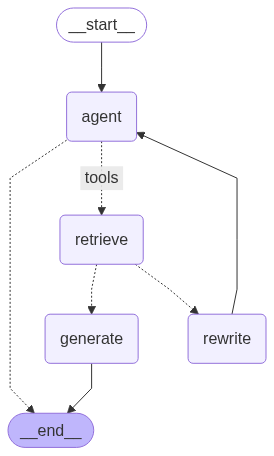

In [96]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_nitr])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [97]:
graph.invoke({"messages":"who is director of NIT rourkela"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


/Users/dhrutamacm2/Desktop/rag_learn/.venv/lib/python3.13/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


{'messages': [HumanMessage(content='who is director of NIT rourkela', additional_kwargs={}, response_metadata={}, id='8e56383c-b88b-4b4d-9b85-038584af2fdf'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_GSgoF9a7MWD6NUaWFs6aDerd', 'function': {'arguments': '{"query":"director of NIT Rourkela"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 110, 'total_tokens': 136, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CAetB94twdVGRIF8VeiC6nYrfk0wc', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--454e6a5a-842c-4a03-a02e-269fec22cb03-0', tool_calls=[{'name': 'retriever_vect

In [98]:
graph.invoke({"messages":"when NIT R established"})

---CALL AGENT---


{'messages': [HumanMessage(content='when NIT R established', additional_kwargs={}, response_metadata={}, id='4e8bbdbd-57c8-4719-b67c-fa48a2b1de83'),
  AIMessage(content='National Institute of Technology Rourkela (NIT Rourkela) was established in 1961.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 24, 'prompt_tokens': 105, 'total_tokens': 129, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CAevc9cW13ZgzGSCnumymqh4m2uYZ', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--83e0e53d-a1bf-4fd0-9721-21463c71b458-0', usage_metadata={'input_tokens': 105, 'output_tokens': 24, 'total_tokens': 129, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': 

In [99]:
graph.invoke({"messages":"how many total students present in NITR"})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---
---CALL AGENT---


{'messages': [HumanMessage(content='how many total students present in NITR', additional_kwargs={}, response_metadata={}, id='3ecb8ccf-b122-4f67-848d-3b86aa0bd16d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_lYTnnt3I2UEjWqhQGmy1eEmU', 'function': {'arguments': '{"query":"total students in NIT Rourkela"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 109, 'total_tokens': 136, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CAezLc1XvUgRTCS0xJyDziywG0niK', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--a67cea45-43ae-44d7-b759-8648e6d388e0-0', tool_calls=[{'name': '

In [100]:
graph.invoke({"messages":"when going to happen convocation NIT Rourkela and which number convocation it is "})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


/Users/dhrutamacm2/Desktop/rag_learn/.venv/lib/python3.13/site-packages/langsmith/client.py:272: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


{'messages': [HumanMessage(content='when going to happen convocation NIT Rourkela and which number convocation it is ', additional_kwargs={}, response_metadata={}, id='1d5d2a27-6e6a-4186-846d-9cf87a8ff6f3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_61cnf7q30FXWg165MdyiSFqj', 'function': {'arguments': '{"query":"NIT Rourkela convocation 2023 date and number"}', 'name': 'retriever_vector_langchain_blog'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 32, 'prompt_tokens': 120, 'total_tokens': 152, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_f33640a400', 'id': 'chatcmpl-CAf5xHglMo9lyMdKm5WkJ9w2DEOCD', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--2b1631